In [7]:
import numpy as np
import pandas as pd
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
sel_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQE\Differential Evolution\StronglyEntanglingLayers\Noise"
adapt_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\ADAPT-VQE\VQE Runs\Files"

potentials = ['QHO', 'AHO', 'DW']

cutoffs = [2, 4, 8, 16, 32, 64, 128, 256]

In [65]:
sel_times = {potential: [] for potential in potentials}
sel_lower_std = {potential: [] for potential in potentials}
sel_upper_std = {potential: [] for potential in potentials}
sel_delta_e = {potential: [] for potential in potentials}

for potential in potentials:
    for cutoff in cutoffs:

        file_path = os.path.join(sel_path, potential, f"{potential}_{cutoff}.json")

        with open(file_path, 'r') as f:
            data = json.load(f)

        converged_indices = [i for i, success in enumerate(data['success']) if success]

        run_times = [data['run_times'][i] for i in converged_indices]
        t_sec = np.array([pd.Timedelta(t).seconds for t in run_times])
        mean_vqe_time = np.mean(t_sec)
        sel_times[potential].append(mean_vqe_time)

        #std_vqe_time = np.std(t_sec)
        upper_std = np.std(t_sec[t_sec >= mean_vqe_time], ddof=1)
        lower_std = np.std(t_sec[t_sec <= mean_vqe_time], ddof=1)
        sel_lower_std[potential].append(lower_std)
        sel_upper_std[potential].append(upper_std)

        
        exact_min_e = np.min(data['exact_eigenvalues'])
        median_e = np.mean([data['results'][i] for i in converged_indices])
        delta_median_e = (abs(exact_min_e - median_e)) 
        sel_delta_e[potential].append(delta_median_e)
        
        

In [66]:
adapt_times = {potential: [] for potential in potentials}
adapt_lower_std = {potential: [] for potential in potentials}
adapt_upper_std = {potential: [] for potential in potentials}
adapt_delta_e = {potential: [] for potential in potentials}

for potential in potentials:
    for cutoff in cutoffs:

        file_path = os.path.join(adapt_path, potential, f"{potential}_{cutoff}.json")

        with open(file_path, 'r') as f:
            data = json.load(f)

        converged_indices = [i for i, success in enumerate(data['success']) if success]

        run_times = [data['run_times'][i] for i in converged_indices]
        t_sec = np.array([pd.Timedelta(t).seconds for t in run_times])
        mean_vqe_time = np.mean(t_sec)
        adapt_times[potential].append(mean_vqe_time)

        #std_vqe_time = np.std(t_sec)
        upper_std = np.std(t_sec[t_sec >= mean_vqe_time], ddof=1)
        lower_std = np.std(t_sec[t_sec <= mean_vqe_time], ddof=1)
        adapt_lower_std[potential].append(lower_std)
        adapt_upper_std[potential].append(upper_std)

        
        exact_min_e = np.min(data['exact_eigenvalues'])
        median_e = np.mean([data['results'][i] for i in converged_indices])
        delta_median_e = (abs(exact_min_e - median_e)) 
        adapt_delta_e[potential].append(delta_median_e)
        

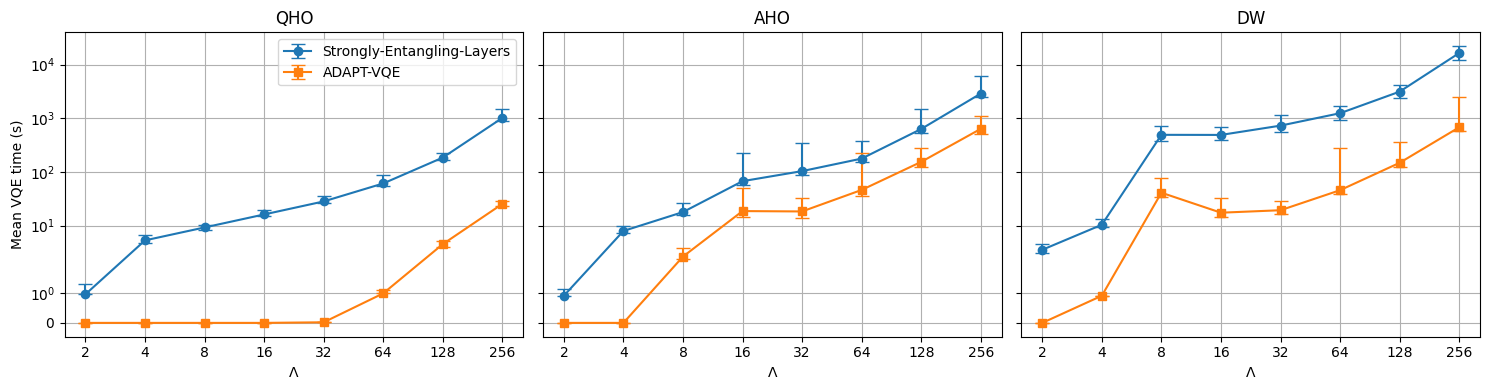

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, potential in enumerate(potentials):
    axs[i].errorbar(cutoffs, sel_times[potential], yerr=[sel_lower_std[potential],sel_upper_std[potential]], marker='o', capsize=5, label='Strongly-Entangling-Layers')
    axs[i].errorbar(cutoffs, adapt_times[potential], yerr=[adapt_lower_std[potential],adapt_upper_std[potential]],marker='s', capsize=5, label='ADAPT-VQE')
    axs[i].set_title(f'{potential}')
    axs[i].set_xlabel('$\\Lambda$')
    axs[i].set_xscale('log')
    axs[i].set_yscale('symlog')
    axs[i].set_xticks(cutoffs)
    axs[i].xaxis.set_major_formatter(ticker.ScalarFormatter())
    axs[i].xaxis.set_minor_locator(ticker.NullLocator())
    axs[i].ticklabel_format(style='plain', axis='x')
    axs[i].grid(True)
    
    if i == 0:
        axs[i].set_ylabel('Mean VQE time (s)')
        axs[i].legend()

plt.tight_layout()
plt.show()


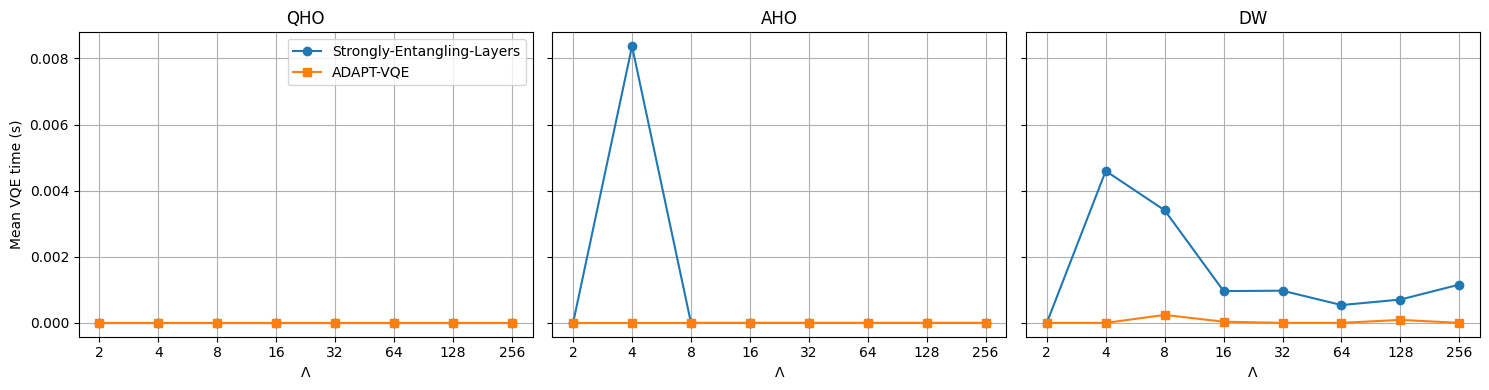

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, potential in enumerate(potentials):
    axs[i].plot(cutoffs, sel_delta_e[potential], marker='o', label='Strongly-Entangling-Layers')
    axs[i].plot(cutoffs, adapt_delta_e[potential], marker='s', label='ADAPT-VQE')
    axs[i].set_title(f'{potential}')
    axs[i].set_xlabel('$\\Lambda$')
    axs[i].set_xscale('log')
    #axs[i].set_yscale('symlog')
    axs[i].set_xticks(cutoffs)
    axs[i].xaxis.set_major_formatter(ticker.ScalarFormatter())
    axs[i].xaxis.set_minor_locator(ticker.NullLocator())
    axs[i].ticklabel_format(style='plain', axis='x')
    axs[i].grid(True)
    
    if i == 0:
        axs[i].set_ylabel('Mean VQE time (s)')
        axs[i].legend()

plt.tight_layout()
plt.show()
